In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Check for missing values
missing_values = X.isnull().sum()

# Preprocessing: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Import necessary models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy

# Display results
results


{'Logistic Regression': 0.9824561403508771,
 'Decision Tree': 0.9122807017543859,
 'Random Forest': 0.956140350877193,
 'SVM': 0.9824561403508771,
 'k-NN': 0.956140350877193}

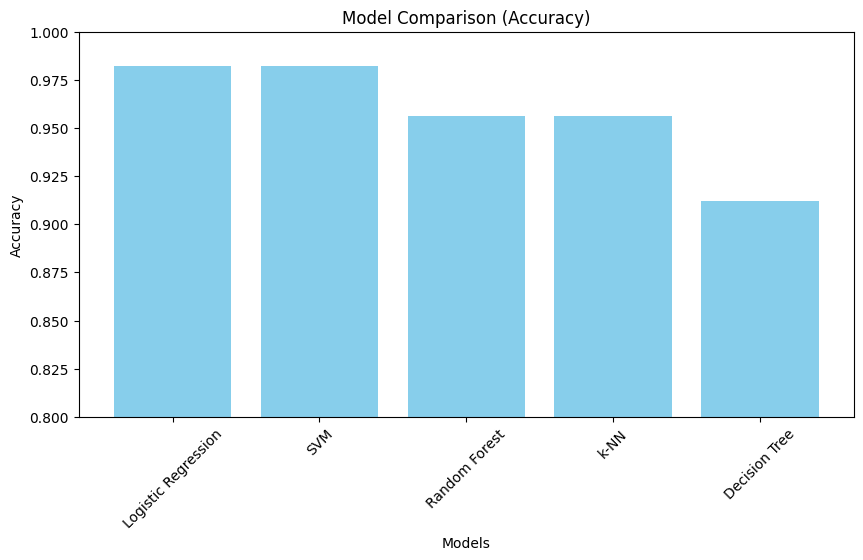

('Logistic Regression', 'Decision Tree')

In [3]:
import matplotlib.pyplot as plt

# Compare performance
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.bar(sorted_results.keys(), sorted_results.values(), color='skyblue')
plt.title('Model Comparison (Accuracy)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()

# Find the best and worst models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
best_model, worst_model


### From this we can understand that Random Forest Classifier is the most suitable model for this dataset due to its high accuracy and robustness.  
### he Decision Tree Classifier performed the worst, highlighting the importance of using ensemble methods to improve prediction accuracy.